In [1]:
import pandas as pd
from sklearn import preprocessing
import glob
import os



In [2]:
list_of_test_files = glob.glob("out/out_test*.csv")
list_of_test_files.sort(key=os.path.getmtime)
last_test_file = list_of_test_files[-1]
list_of_train_files = glob.glob("out/out_train*.csv")
list_of_train_files.sort(key=os.path.getmtime)
last_train_file = list_of_train_files[-1]

print(last_test_file)
print(last_train_file)

out/out_test_20200526-125629.csv
out/out_train_20200526-125357.csv


In [30]:
new_data = pd.read_csv(last_test_file, usecols=['city', 'weekofyear', 'total_cases'])
# worst_data = pd.read_csv('out/out20200421-122140.csv', usecols=['total_cases'])
best_data_reg = pd.read_csv('out/out_test_20200512-234321.csv', usecols=['total_cases'])
best_data = pd.read_csv('models/best-26-05-14,94MAE-iq-fixed.csv', usecols=['total_cases'])
# worst_data = pd.read_csv('out/out_test_20200526-124534.csv', usecols=['total_cases'])
train_data = pd.read_csv('dengue_features_train_with_out.csv')
train_data_out = pd.read_csv(last_train_file, usecols=['total_cases'])

In [31]:
new_data['best_total_cases'] = best_data['total_cases'].astype(int)
new_data['best_data_reg'] = best_data_reg['total_cases'].astype(int)
# new_data['old_data'] = worst_data['total_cases'].astype(int)
new_data['total_cases'] = new_data['total_cases'].astype(int)

In [32]:
num = 3
new_data.iloc[-num:].append(new_data, ignore_index=True)

,city,weekofyear,total_cases,best_total_cases,best_data_reg
0,iq,24,2,2,1
1,iq,25,1,1,2
2,iq,26,0,0,1
3,sj,18,2,6,6
4,sj,19,4,7,6
...,...,...,...,...,...
414,iq,22,3,3,3
415,iq,23,6,6,1
416,iq,24,2,2,1
417,iq,25,1,1,2


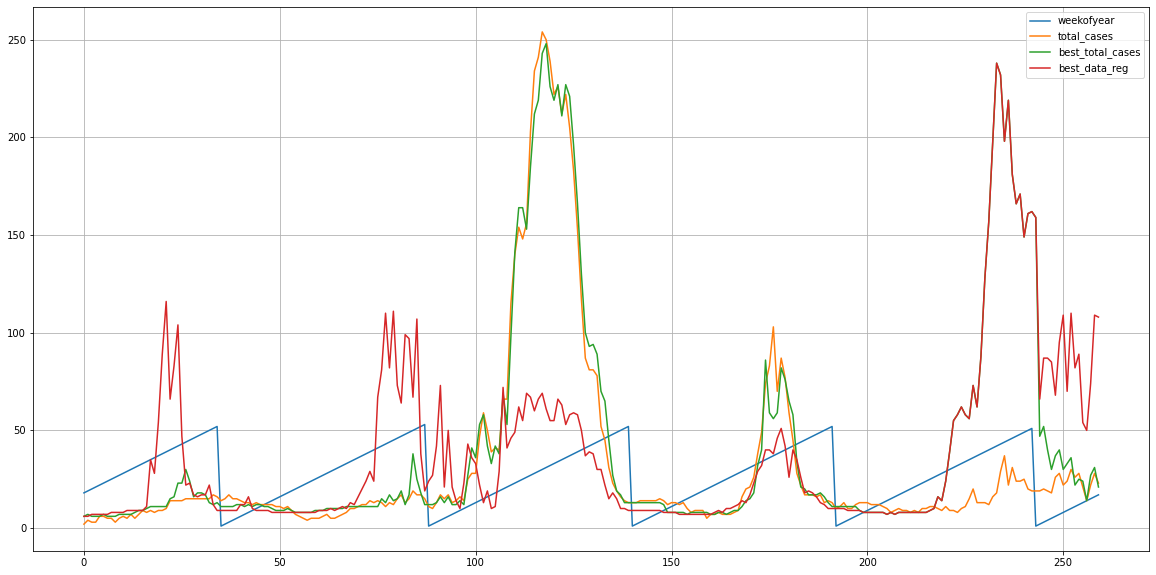

In [33]:
new_data[new_data['city'] == 'sj'].plot(figsize=(20,10), grid=True)

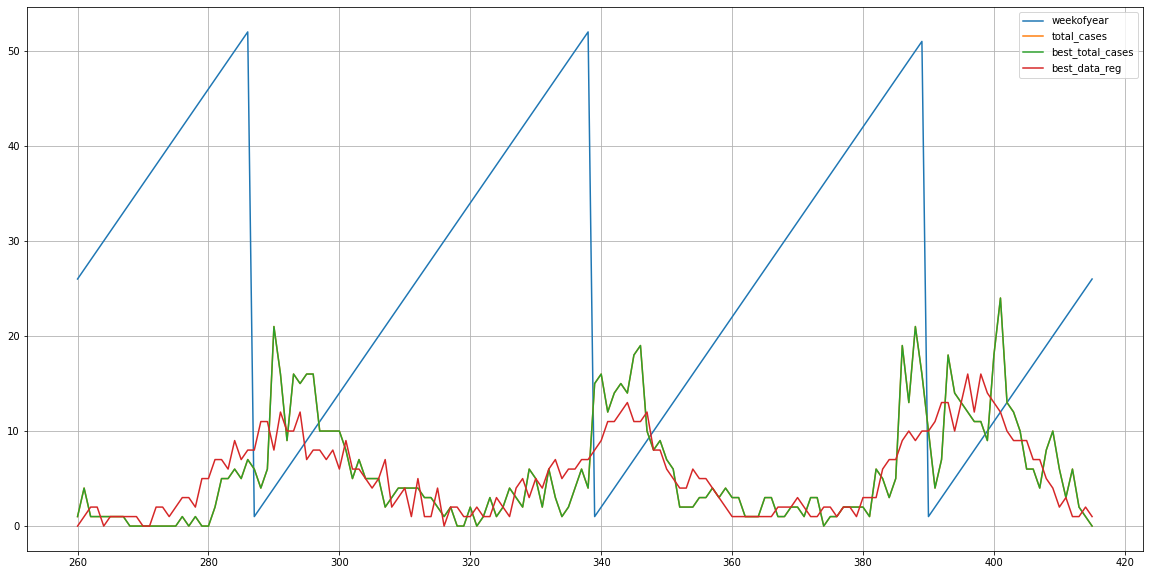

In [34]:
new_data[new_data['city'] == 'iq'].plot(figsize=(20,10), grid=True)

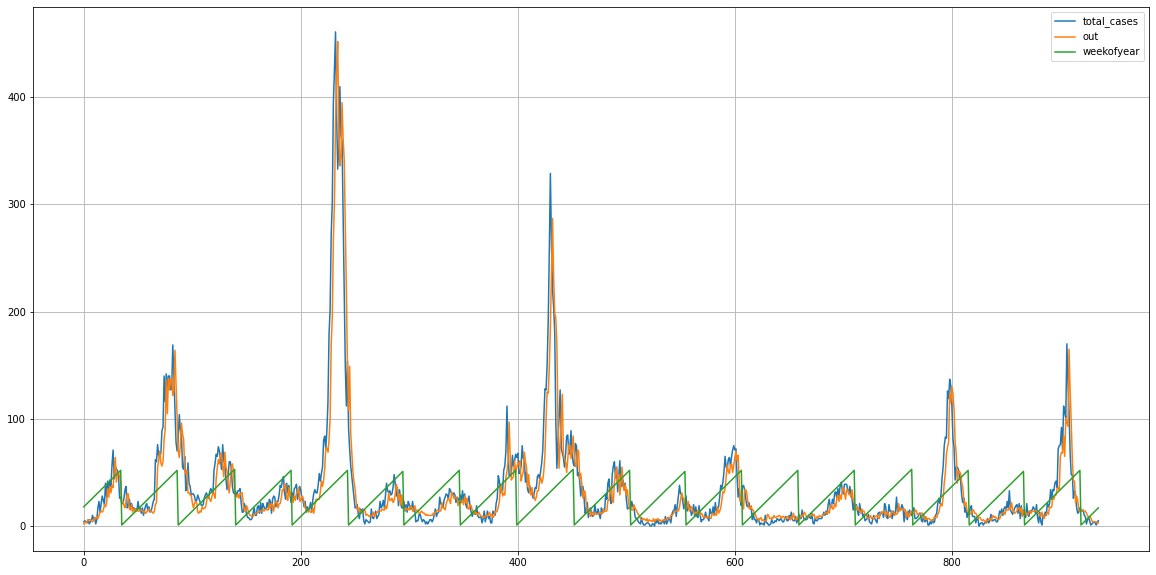

In [35]:
train_data['out'] = train_data_out['total_cases']
train_data[train_data['city'] == 'sj'][['total_cases', 'out', 'weekofyear']].plot(figsize=(20,10), grid=True)

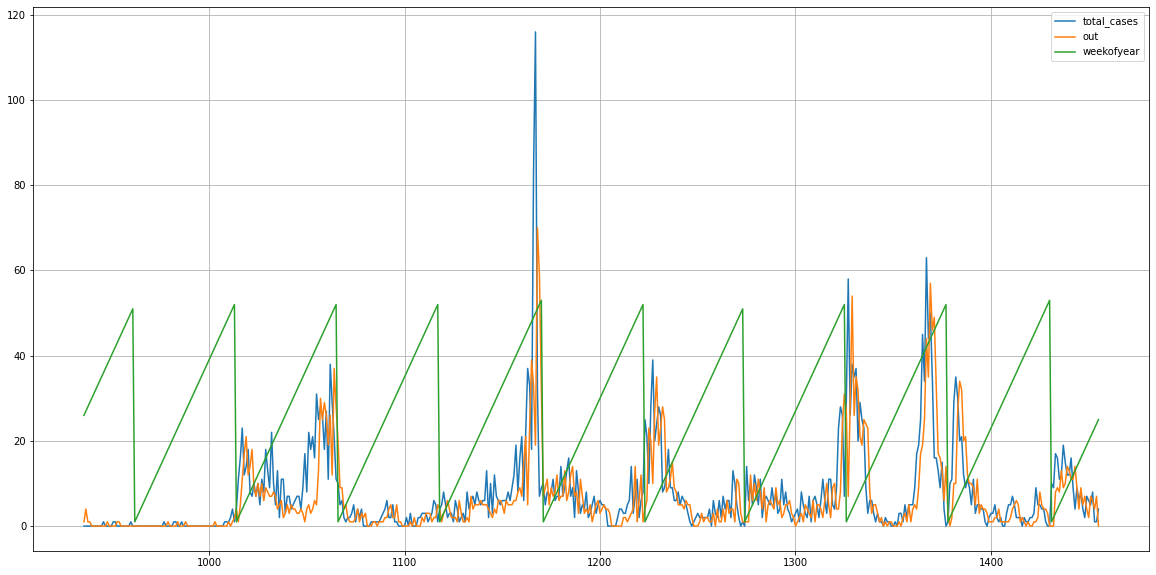

In [36]:
train_data[train_data['city'] == 'iq'][['total_cases', 'out', 'weekofyear']].plot(figsize=(20,10), grid=True)